DATE - 01/06/2023

In [102]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten,Dense

from tensorflow.keras import Sequential

In [103]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
from keras_tuner import RandomSearch

In [105]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
#FASHION_MNIST DATASET WHICH IS PRESTORED IN KERAS LIBRARY
# (X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()
(X_train , y_train) , (X_test , y_test) = keras.datasets.fashion_mnist.load_data()

In [107]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Training set have 60000 snapshot of CLOTHS which have image size of 28*28 and Test data (X_test) has 10000 images. Each image is 2D and its pixel ranges from 0 to 255. 

---



we have images of clothing such as Tshirt, trousers, pullovers, dresses, coats, sandals,s and have a total of 10 labels.

9

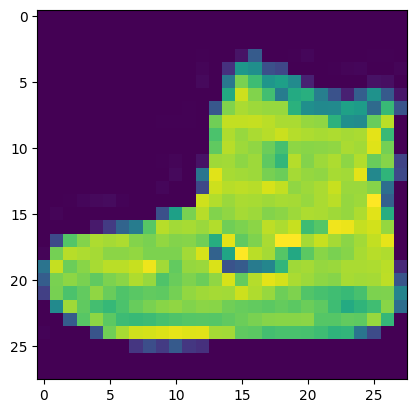

In [108]:
#1th snapshot for training
plt.imshow(X_train[0])
#digit is 
y_train[0]

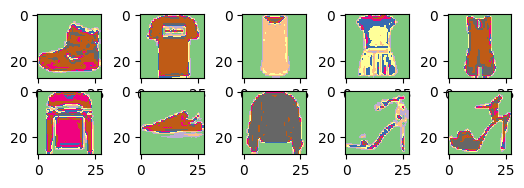

In [109]:
#visualizing the first 10 images in the dataset


for i in range(10):

    #subplot

    plt.subplot(5, 5, i+1)

    # plotting pixel data

    plt.imshow(X_train[i], cmap=plt.get_cmap('Accent'))

9

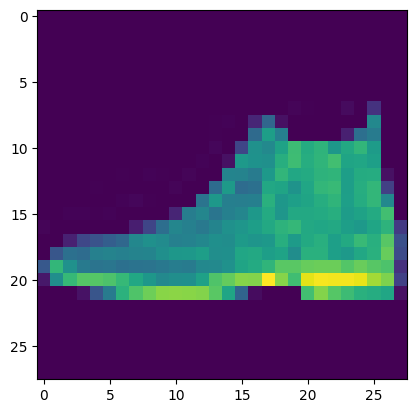

In [110]:
#1th  snapshot for test
plt.imshow(X_test[0])
#digit is 
y_test[0]

In [111]:
#Normalizing data 
X_train = X_train / 255
X_test = X_test/255

In [112]:
#As we know our data is 2D(28*28) array so convertning it into 1D array we have to flatten
#to feed them into the Artificial Neural network model,
oneD = 28*28
X_train_flattened = X_train.reshape(len(X_train) , oneD)
X_test_flattened = X_test.reshape(len(X_test)  , oneD)
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [113]:
class_mod = Sequential()

In [114]:
class_mod.add(Flatten(input_shape = (28,28)))
# class_mod.add(Dense(128,activation='relu'))  #nodesize = 128 
class_mod.add(Dense(10,activation = 'softmax')) #10 is 0 to 9 number classification

we are using the softmax activation function as we have a multi-class classification problem and have more than two class labels.

In [115]:
class_mod.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [116]:
from sklearn.metrics import f1_score

In [117]:
class_mod.compile(optimizer='Adam' , loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

For the optimizer, we have used Adam for updating the weights, to achieve minimum losses in the model and Accuracy as a metric.

we are using sparse_categorical_crossentropy as there are more than two labels in our dataset.



In [118]:
result = class_mod.fit(X_train,y_train,batch_size=64,epochs=5,verbose=1, validation_data=(X_test,y_test) )
# result = class_mod.fit(X_train,y_train,batch_size=64,epochs=5,verbose=1,validation_split=0.2)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.6559 - accuracy: 0.7811 - val_loss: 0.5308 - val_accuracy: 0.8206
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.4812 - accuracy: 0.8359 - val_loss: 0.4877 - val_accuracy: 0.8320
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.4501 - accuracy: 0.8462 - val_loss: 0.4703 - val_accuracy: 0.8388
Epoch 4/5
938/938 [==============================] - 1s 2ms/step - loss: 0.4322 - accuracy: 0.8511 - val_loss: 0.4631 - val_accuracy: 0.8368
Epoch 5/5
938/938 [==============================] - 1s 1ms/step - loss: 0.4219 - accuracy: 0.8553 - val_loss: 0.4634 - val_accuracy: 0.8408


one process of forwarding and backpropagation of the training dataset is known as one epoch.

**we can see that the training accuracy is 85.53% and the loss is 0.4219. Let’s 


evaluate the model on test data as well.**

In [119]:
class_mod.evaluate(X_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4634 - accuracy: 0.8408


[0.46340882778167725, 0.8407999873161316]

**For the test accuracy, we got 84.08% and the loss is 0.4634**

In [120]:
y_pred = class_mod.predict(X_test)
y_pred[0]

313/313 [==============================] - 1s 2ms/step


array([1.6395965e-06, 9.2275781e-07, 2.9504141e-05, 1.0839351e-05,
       4.7659905e-05, 2.0515403e-01, 4.4915949e-05, 1.8247108e-01,
       1.0156863e-02, 6.0208255e-01], dtype=float32)

10 scores

In [121]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [122]:
np.argmax(y_pred[0])

9

In [123]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
# y_predicted_labels[:5]

In [124]:
con_mat = tf.math.confusion_matrix(labels=y_test , predictions = y_predicted_labels)

Text(50.722222222222214, 0.5, 'actual')

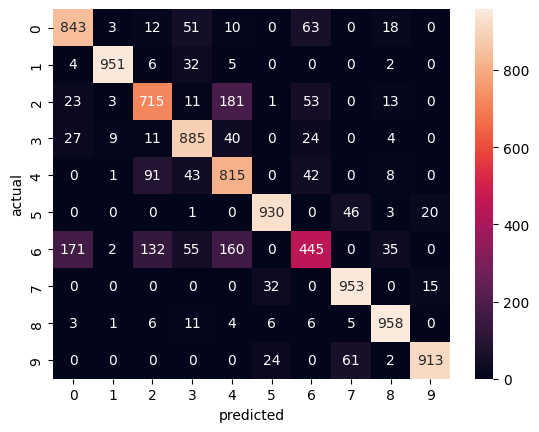

In [125]:
import seaborn as sn
sn.heatmap(con_mat, annot=True , fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

In [126]:
from sklearn.metrics import confusion_matrix, f1_score


# Compute the F1 score for each class
f1_scores = f1_score(y_test, y_predicted_labels, labels=None, average=None, sample_weight=None, zero_division='warn')

# Compute the macro-average F1 score
macro_average_f1 = f1_score(y_test, y_predicted_labels, labels=None, average='macro', sample_weight=None, zero_division='warn')

print("F1 Score for each class:", f1_scores)
print("Macro-average F1 Score:", macro_average_f1)



F1 Score for each class: [0.81409947 0.96548223 0.72478459 0.84729536 0.73589165 0.93326643
 0.54500919 0.92300242 0.93783651 0.93737166]
Macro-average F1 Score: 0.8364039516378305


**Macro-avg F1 score : 0.83 for model 1**

#TRAINING OTHER MODEL WHICH INCLUDES HIDDEN LAYER USING ReLU ACTIVATION FUNCTION  

In [127]:
model_2 = Sequential()

In [128]:
model_2.add(Flatten(input_shape = (28,28)))
model_2.add(Dense(256,activation='relu'))  # First hidden layer 
model_2.add(Dense(128,activation='relu'))  # Second hidden layer
model_2.add(Dense(64,activation='relu'))  # Third hidden layer
model_2.add(Dense(10,activation = 'softmax')) #Output layer

In [129]:
model_2.compile(optimizer='Adam' , loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [130]:
result = model_2.fit(X_train,y_train,batch_size=64,epochs=10,verbose=1, validation_data=(X_test,y_test))

  #Epoches= 10 changes

Epoch 1/10
938/938 [==============================] - 10s 8ms/step - loss: 0.4973 - accuracy: 0.8206 - val_loss: 0.3994 - val_accuracy: 0.8558
Epoch 2/10
938/938 [==============================] - 8s 8ms/step - loss: 0.3615 - accuracy: 0.8669 - val_loss: 0.3753 - val_accuracy: 0.8664
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3269 - accuracy: 0.8800 - val_loss: 0.3631 - val_accuracy: 0.8649
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3051 - accuracy: 0.8866 - val_loss: 0.3365 - val_accuracy: 0.8778
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2842 - accuracy: 0.8947 - val_loss: 0.3466 - val_accuracy: 0.8789
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2706 - accuracy: 0.8985 - val_loss: 0.3294 - val_accuracy: 0.8768
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2577 - accuracy: 0.9021 - val_loss: 0.3241 - val_accuracy: 0.8847
Epoch

**We can see that the training accuracy is 90.45% and the loss is 0.31. Let’s evaluate the model on test data as well.**

In [131]:
model_2.evaluate(X_test , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3547 - accuracy: 0.8784


[0.3546542227268219, 0.8784000277519226]

**For the test accuracy, we got 87.92% and the loss is 0.3419**

In [132]:
y_pred = model_2.predict(X_test)
y_pred[0]

313/313 [==============================] - 1s 3ms/step


array([5.0016029e-06, 9.0369440e-07, 1.1648231e-07, 7.4440621e-08,
       5.4039049e-07, 3.7595596e-02, 1.9564162e-07, 2.8750025e-02,
       4.7325780e-06, 9.3364263e-01], dtype=float32)

In [133]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[0]

9

In [134]:
f1_scores = f1_score(y_test, y_predicted_labels, labels=None, average=None, sample_weight=None, zero_division='warn')

# Compute the macro-average F1 score
macro_average_f1 = f1_score(y_test, y_predicted_labels, labels=None, average='macro', sample_weight=None, zero_division='warn')

print("F1 Score for each class:", f1_scores)
print("Macro-average F1 Score:", macro_average_f1)

F1 Score for each class: [0.81332083 0.98238551 0.80255403 0.87213115 0.80838615 0.96893788
 0.69605331 0.93365155 0.97259591 0.93681462]
Macro-average F1 Score: 0.8786830928216462


**Macro-avg F1 score : 0.8788 for model 2**

**Getting better result**

We have built the basic ANN model and got the training and testing accuracy as shown in the above figures. We can see the difference in accuracies and losses of the training and test sets. 

#Hyperparameter Tuning in Neural Networks

prerequisites to use Keras tuner

Tensorflow 2.0+ (I had Tensorflow 2.1.0 in my system but still it didn’t work so had to upgrade it to 2.6.0)

In [135]:
print(tf.__version__)

2.12.0


In [136]:
def model_3(hyper_para):          
    model=Sequential()
    model.add(Flatten(input_shape=(28,28)))
    
    
    model.add(Dense(units=hyper_para.Int('num_of_neurons',min_value=32,max_value=512,step=32),
                                    activation='relu'))
    #output layer
    model.add(Dense(10,activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(hyper_para.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [137]:
#feeding the model and parameters to Random Search
tunning =RandomSearch(model_3,objective='val_accuracy',max_trials=5,executions_per_trial=3,directory='tuner1',project_name='Clothing')

In [138]:
tunning.search_space_summary()

Search space summary
Default search space size: 2
num_of_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [139]:
tunning.search(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

In [140]:
tunning.results_summary()

Results summary
Results in tuner1/Clothing
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
num_of_neurons: 320
learning_rate: 0.001
Score: 0.8865999976793925

Trial 1 summary
Hyperparameters:
num_of_neurons: 448
learning_rate: 0.0001
Score: 0.878766675790151

Trial 2 summary
Hyperparameters:
num_of_neurons: 288
learning_rate: 0.0001
Score: 0.872866670290629

Trial 0 summary
Hyperparameters:
num_of_neurons: 192
learning_rate: 0.01
Score: 0.8536333441734314

Trial 4 summary
Hyperparameters:
num_of_neurons: 160
learning_rate: 0.01
Score: 0.8528333504994711


#RESULTS 

#IN MODEL 1 
TEST ACCURACY IS - 83.64%

#IN MODEL 2 (USING HIDDEN LAYER) 
TEST ACCURACY IS - 87.92%

#IN MODEL 3 (AFTER TUNNING HYPER PARAMETERS) 
TEST ACCURACY IS - 88.85%

number_of_neurons = 320 

learning_rate = 0.001


In [141]:
model_3_apply = Sequential()

In [142]:
model_3_apply.add(Flatten(input_shape = (28,28)))
model_3_apply.add(Dense(320,activation='relu'))  
model_3_apply.add(Dense(10,activation = 'softmax')) 

In [143]:
model_3_apply.compile(optimizer='Adam' , loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [144]:
result = model_3_apply.fit(X_train,y_train,batch_size=64,epochs=5,verbose=1, validation_data=(X_test,y_test))

Epoch 1/5
938/938 [==============================] - 6s 5ms/step - loss: 0.4940 - accuracy: 0.8280 - val_loss: 0.4223 - val_accuracy: 0.8484
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3681 - accuracy: 0.8670 - val_loss: 0.3925 - val_accuracy: 0.8605
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.3308 - accuracy: 0.8793 - val_loss: 0.3658 - val_accuracy: 0.8696
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3040 - accuracy: 0.8876 - val_loss: 0.3617 - val_accuracy: 0.8706
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2856 - accuracy: 0.8946 - val_loss: 0.3324 - val_accuracy: 0.8805


In [145]:
model_3_apply.evaluate(X_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3324 - accuracy: 0.8805


[0.3323744535446167, 0.8805000185966492]

In [146]:
y_pred = model_3_apply.predict(X_test)
y_pred[0]

313/313 [==============================] - 1s 2ms/step


array([5.6742268e-05, 1.1553392e-07, 4.8426227e-07, 2.3452303e-07,
       5.1978068e-06, 1.2609430e-02, 7.4432115e-05, 4.4500869e-02,
       2.5010711e-04, 9.4250244e-01], dtype=float32)

In [147]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[0]

9

In [148]:
f1_scores = f1_score(y_test, y_predicted_labels, labels=None, average=None, sample_weight=None, zero_division='warn')

# Compute the macro-average F1 score
macro_average_f1 = f1_score(y_test, y_predicted_labels, labels=None, average='macro', sample_weight=None, zero_division='warn')

print("F1 Score for each class:", f1_scores)
print("Macro-average F1 Score:", macro_average_f1)

F1 Score for each class: [0.83479106 0.98236776 0.78903573 0.87799791 0.79198473 0.96819788
 0.68432203 0.94513099 0.97111554 0.957     ]
Macro-average F1 Score: 0.8801943641732424


**We observe that our Macro F1 score is higher after tunning the parameter**